<a href="https://colab.research.google.com/github/ahmedaljassas/ahmedaljassas/blob/main/Assignment6_ImageCompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the libraries

In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import Dense, Input

import numpy as np

import matplotlib.pyplot as plt

tf.__version__

'2.13.0'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

### Visualizing the images

In [8]:
np.random.randint(0, 59999)

52041

0


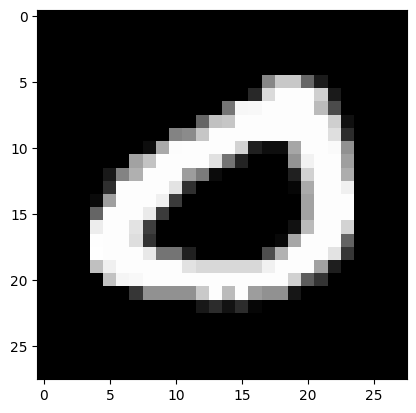

In [9]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [10]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

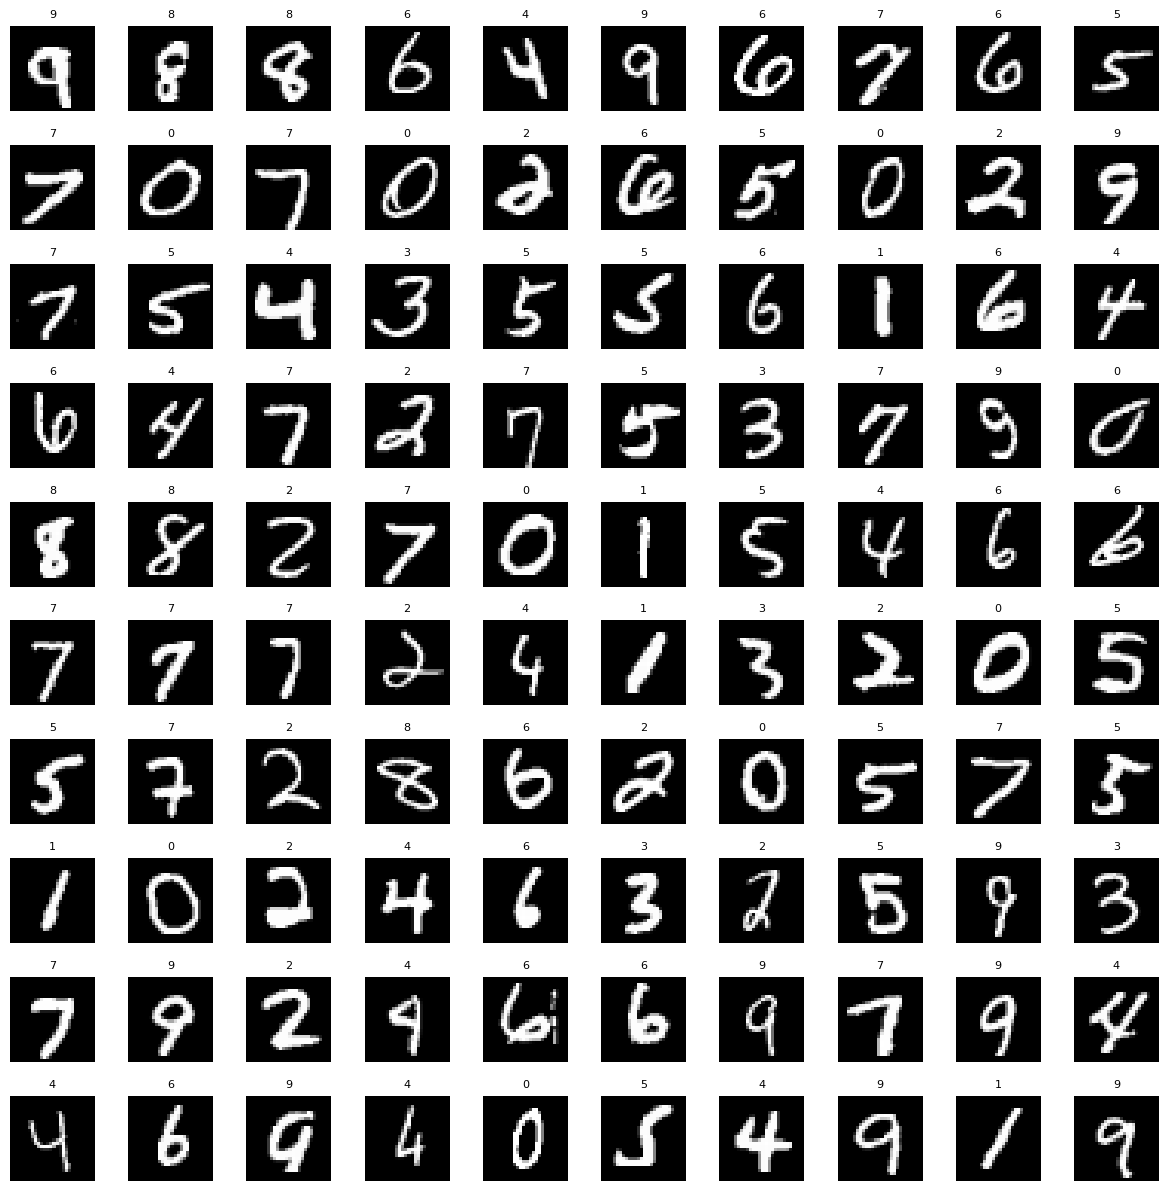

In [11]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15))

#print(axes.shape)
axes = axes.ravel() # -› (10,10) -> [100]

#print(axes.shape)
for i in np.arange(0, width * height):
  index = np.random.randint(0, 59999)
  axes[i].imshow (X_train[index], cmap = 'gray')
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


### Pre-processing the images

In [12]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [18]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

### Building and training the autoencoder

In [19]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [20]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu'))

# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [21]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [22]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 11s 3ms/step - loss: 0.1538 - accuracy: 0.0094
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1112 - accuracy: 0.0107
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1028 - accuracy: 0.0122
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0980 - accuracy: 0.0127
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0951 - accuracy: 0.0132
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0932 - accuracy: 0.0132
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0919 - accuracy: 0.0139
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0909 - accuracy: 0.0140
Epoch 9/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0901 - accuracy: 0.0142
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.08

### Encoding the images

In [25]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [26]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [27]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [28]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [29]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110816 (432.88 KB)
Trainable params: 110816 (432.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


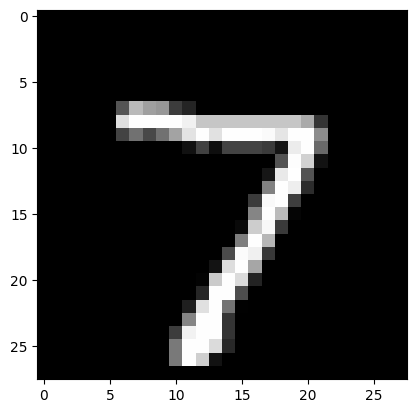

In [30]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

In [31]:
X_test[0].shape

(784,)

In [32]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [33]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

1/1 [==============================] - 0s 76ms/step


In [34]:
encoded_image, encoded_image.shape

(array([[7.4404864, 5.4854755, 2.923361 , 3.7221262, 4.4345026, 1.8943701,
         3.3429868, 6.5772924, 2.800089 , 0.       , 0.       , 0.       ,
         6.987298 , 7.953348 , 0.       , 8.279461 , 0.       , 5.047658 ,
         0.       , 5.2949333, 0.       , 2.5802312, 1.9767916, 5.1616073,
         6.4921427, 4.743689 , 4.8820586, 0.       , 3.0356696, 0.       ,
         0.       , 3.2895331]], dtype=float32),
 (1, 32))

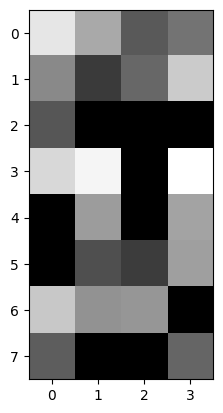

In [35]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

### Decoding the images

In [36]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222384 (868.69 KB)
Trainable params: 22238

In [37]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))

In [38]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 88ms/step


In [39]:
decoded_image.shape

(1, 784)

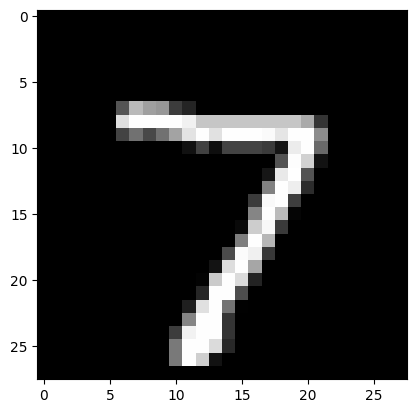

In [40]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray');

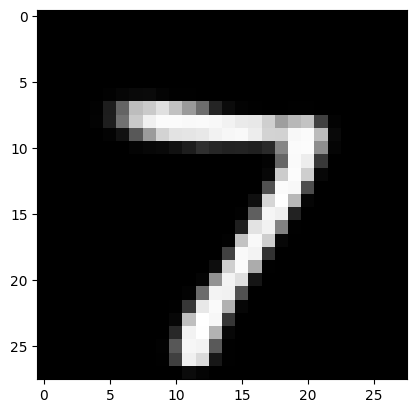

In [41]:
plt.imshow(decoded_image.reshape(28,28), cmap = 'gray');

### Encoding and decoding the test images

In [42]:
X_test.shape[0] # 9999

10000

1/1 [==============================] - 0s 20ms/step


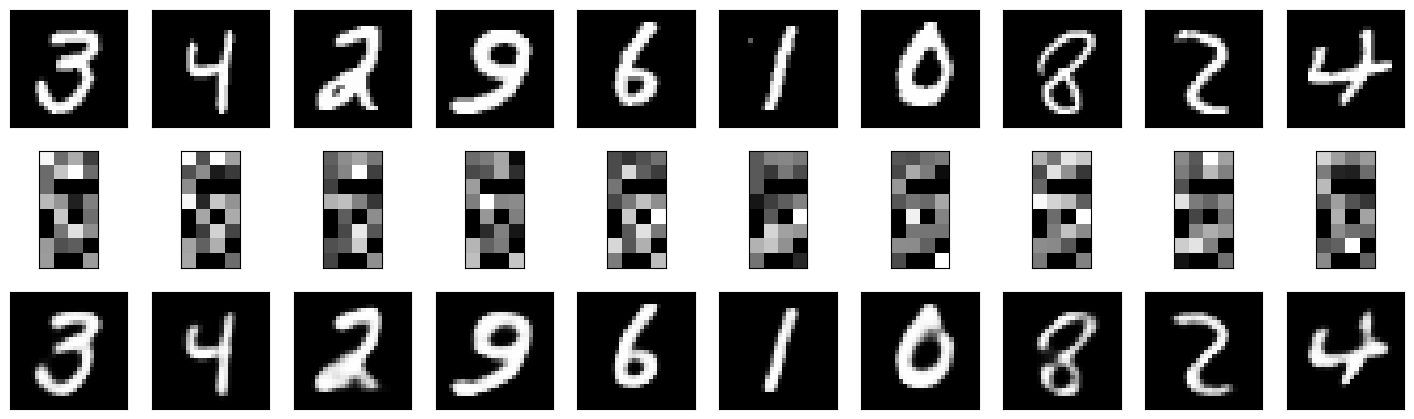

In [44]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
	#print(i, image_index)
	# Original image
	ax = plt.subplot(10,10,i + 1)
	plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
	plt.xticks(())
	plt.yticks(())

# Coded images
	ax = plt.subplot(10,10,i + 1 + n_images)
	encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
	plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
	plt.xticks(())
	plt.yticks(())

# Decoded images
	ax = plt.subplot(10,10,i + 1 + n_images * 2)
	plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap = 'gray')
	plt.xticks(())
	plt.yticks(())